# Mohammad Sina Parvizi Motlagh - 810101394
Artificial Intelligence - CA1: **`Genetic Algorithm`** - Spring 1403 \
Goal: We have to implement a genetic algorithm to solve **`knapsack problem`**.

# Genetic Algorithm Implementation

The objective of this implementation is to solve the knapsack problem using a genetic algorithm. The goal is to find the optimal solution, which involves selecting a combination of items (snacks) from a given CSV file while adhering to specified constraints provided via input.

## Steps:

1. **`Chromosome Definition`**: The first step involves defining the structure of the chromosomes. These chromosomes represent potential solutions to the knapsack problem.

2. **`Initialization`**: Random solutions are generated to initialize the population of chromosomes. These solutions serve as starting points for the genetic algorithm.

3. **`Fitness Function`**: A fitness function is defined to evaluate the quality of each chromosome. This function measures how well a chromosome satisfies the constraints of the knapsack problem and how close it is to the optimal solution.

4. **`Genetic Operations`**:
    - **`Crossover`**: Chromosomes undergo crossover operations to create new offspring. This process combines the genetic information of two parent chromosomes to produce potentially better solutions.
    - **`Mutation`**: Some chromosomes undergo mutation, introducing small random changes to their genetic makeup. Mutation helps introduce diversity into the population and prevent premature convergence to suboptimal solutions.

5. **`Selection`**: Chromosomes are selected for the next generation based on their fitness. The fittest chromosomes are more likely to be chosen for reproduction, ensuring that better solutions are carried forward to subsequent generations.

6. **`Termination and Comparison`**: The genetic algorithm iterates through multiple generations, continually improving the solutions. Finally, the best solution from each generation is compared, and the overall best solution is determined.

By following these steps, the genetic algorithm iteratively evolves solutions to the knapsack problem, ultimately aiming to find the optimal combination of items that maximizes value while respecting constraints.

In [67]:
# Imports
# Need random library to generate random numbers.
# Nedd matplotlib library to draw some plots
import matplotlib.pyplot as plt
import random

# CSV-File
I made a class **`Snack_Items`** to store the csv-file in a list called `Snacks`. The csv file is about the name of snacks, their values and their available weight.

In [68]:
# Class for storing the csv-file in a list
class Snack_Items:
    def __init__(self, name, available_weight, value):
        self.name = name
        self.available_weight = available_weight
        self.value = value

In [69]:
# Store csv-file in a list
file_name = "snacks.csv"
Snacks = []
with open (file_name, "r") as f:
    next(f)
    for line in f:
        new_line = line.split(",")
        name, weight, value = new_line[0], new_line[1], new_line[2]
        new_item = Snack_Items(str(name), float(weight), float(value))
        Snacks.append(new_item)

# Test that created list
for snack in Snacks:
    print(snack.name, snack.value, snack.available_weight)

MazMaz 10.0 10.0
Doogh-e-Abali 10.0 15.0
Nani 5.0 5.0
Jooj 15.0 7.0
Hot-Dog 15.0 20.0
Chips 6.0 8.0
Nooshaba 8.0 12.0
Shokolat 7.0 6.0
Chocoroll 12.0 9.0
Cookies 11.0 11.0
Abnabat 4.0 4.0
Adams-Khersi 9.0 14.0
Popcorn 13.0 16.0
Pastil 7.0 3.0
Tordilla 9.0 10.0
Masghati 6.0 5.0
Ghottab 10.0 7.0
Saghe-Talaei 11.0 9.0
Choob-Shoor 12.0 13.0


# Parameters
The genetic algorithm relies on several parameters to tailor its behavior and guide the solution process for the knapsack problem:

- `GENERATION_SIZE`: The number of generations the algorithm will iterate through.
- `POPULTAION_SIZE`: The number of chromosomes (candidate solutions) in each generation.
- `SNACKS_COUNT`: The number of genes (snacks) in each chromosome.
- `MAX_WEIGHT`: The maximum weight that the knapsack can hold.
- `MIN_VALUE`: The minimum value of snacks that should be included in the knapsack.
- `MIN_LIMIT`: The minimum number of snacks that must be picked.
- `MAX_LIMIT`: The maximum number of snacks that can be picked.
- `MUTATION_RATE`: The probability of applying mutation to a chromosome during reproduction.
- `CROSSOVER_RATE`: The probability of applying crossover (recombination) to produce offspring.
- `GENERATION_LIST`: The list of generations!
  
These parameters play a crucial role in shaping the genetic algorithm's search strategy and determining the characteristics of the solutions it generates. Fine-tuning these parameters can significantly impact the algorithm's performance and the quality of the solutions obtained.

In [70]:
# Parameters
GENERATION_SIZE = 100
POPULATION_SIZE = 100
MAX_WEIGHT = 80
MIN_VALUE = 95
MIN_LIMIT = 19
MAX_LIMIT = 19
MUTATION_RATE = 0.2
CROSSOVER_RATE = 0.9
SNACKS_COUNT = len(Snacks)
GENERATION_LIST = [i + 1 for i in range(GENERATION_SIZE)]

# Fitness-Function and Computational Functions

In the following cells, I will define several computational functions to assist in calculating values necessary for determining the fitness of a chromosome:

- **`calculate_weight()`**: Calculates the total weight of a chromosome.
- **`calculate_value()`**: Computes the total value of a chromosome.
- **`count_num_of_picked_items()`**: Returns the number of picked items for each chromosome.
- **`factor_based_on_picked_items()`**: Determines a factor based on the number of picked items:
    - If the number of picked items is below `MIN_LIMIT`, it returns the difference plus 1.
    - If it is above `MAX_LIMIT`, it returns the difference plus 1.
    - If it falls within the range `[MIN_LIMIT, MAX_LIMIT]`, it returns 1.
- **`factor_based_on_value()`**: Decides a factor based on the value of a chromosome:
    - If the value of a chromosome is below or equal to `MIN_VALUE`, it returns the difference plus 1.
    - Otherwise, it returns 1, indicating that the value satisfies the constraint.
- **`factor_based_on_weight()`**: Determines a factor based on the weight of a chromosome:
    - If the weight of a chromosome is above or equal to `MAX_WEIGHT`, it returns the difference plus 1 multiplied by 2.
    - Otherwise, it returns 1, indicating that the weight satisfies the constraint.

Finally, the **`fitness_function()`** calculates the fitness of a chromosome using the formula:

$$ fitness = \frac{value}{res\_factor} $$

where $ {res\_factor} $ is the product of three factors:
- $ {picked\_items\_based\_factor} $ (calculated in **`factor_based_on_picked_items()`** function).
- $ {value\_based\_factor} $ (calculated in **`factor_based_on_value()`** function).
- $ {weight\_based\_factor} $ (calculated in **`factor_based_on_weight()`** function).


In [71]:
# Function to calculate the total weight of a chromosome
def calculate_weight(i_list, s_list):
    total_weight = 0
    for i in range(len(i_list)):        
        if s_list[i] != 0:
            total_weight += s_list[i]
    
    return round(total_weight, 3)

In [72]:
# Function to calculate the total value of a chromosome
def calculate_value(i_list, s_list):
    total_value = 0
    for i in range(len(i_list)):
        if s_list[i] != 0:
            total_value += s_list[i] * i_list[i].value / i_list[i].available_weight
    
    return round(total_value, 3)

In [73]:
# Function to count the number of picked items in a chromosome
def count_num_of_picked_items(lst):
    return sum(1 for bit in lst if bit != 0)

In [74]:
# Function to calculate the factor based on the number of picked items
def factor_based_on_picked_items(s_list):
    num_of_non_zero = count_num_of_picked_items(s_list)
    if num_of_non_zero < MIN_LIMIT:
        factor = MIN_LIMIT - num_of_non_zero + 1
    elif num_of_non_zero > MAX_LIMIT:
        factor = num_of_non_zero - MAX_LIMIT + 1
    else:
        factor = 1  
    
    return factor

In [75]:
# Function to calculate the factor based on the value of a chromosome
def factor_based_on_value(i_list, s_list):
    value = calculate_value(i_list, s_list)
    if value <= MIN_VALUE:
        factor = MIN_VALUE - value + 1
    else:
        factor = 1
        
    return factor

In [76]:
# Function to calculate the factor based on the weight of a chromosome
def factor_based_on_weight(i_list, s_list):
    weight = calculate_weight(i_list, s_list)
    if weight >= MAX_WEIGHT:
        factor = (weight - MAX_WEIGHT + 1) * 2
    else:
        factor = 1
        
    return factor

In [77]:
# Fitness Function
def fitness_function(i_list, s_list):
    value = calculate_value(i_list, s_list)
    weight = calculate_weight(i_list, s_list)
    
    picked_items_based_factor = factor_based_on_picked_items(s_list)
    value_based_factor = factor_based_on_value(i_list,s_list)
    weight_based_factor = factor_based_on_weight(i_list, s_list)
    
    res_factor = picked_items_based_factor * weight_based_factor * weight_based_factor
    
    total = value / (round(res_factor, 3))
    
    return round(total, 3)

# Population Initialization

To create the initial population, we will use the **`initial_population()`** function. This function will generate a random population for the first generation, where each individual chromosome represents a potential solution to the knapsack problem. The size of the population is determined by the `POPULATION_SIZE` parameter, and the length of each chromosome is equal to `SNACKS_COUNT`. 

Each gene within a chromosome corresponds to the weight of a snack, represented as a floating-point number within the range `[0, AVAILABLE_WEIGHT[SNACK_ITEM]]`.

This process involves the following steps:

- **`create_random_solution()`**: This function generates a random chromosome (solution) by randomly selecting a subset of snacks. The number of snacks selected is chosen randomly between 2 and 4, and their weights are randomly assigned within the available weight range for each snack item.

- **`initial_population()`**: This function creates the initial population by repeatedly calling `create_random_solution()` until the desired population size is reached. Each generated chromosome is appended to the population list.

In [78]:
# Make a random solution
def create_random_solution(i_list):
    solution = [0] * len(i_list)
    random_number = random.randint(2, 4)
    
    indices_to_replace = random.sample(range(len(i_list)), random_number)
    
    for index in indices_to_replace:
        solution[index] = round(random.uniform(0.1, i_list[index].available_weight), 1)
        
    return solution

In [79]:
# Generate a population
def initial_population(pop_size, i_list):
    population = []
    i = 0
    while i < pop_size:
        new_solution = create_random_solution(i_list)
        population.append(new_solution)
        i += 1
    
    return population

# Crossover and Mutation Implementation

In the following cells, I will define the functions responsible for crossover and mutation operations in the genetic algorithm.

- **`crossover()`**: This function implements the crossover operation, which involves combining genetic material from two parent chromosomes to produce offspring chromosomes. For each pair of consecutive chromosomes in the population, a random number is generated. If this number is smaller than or equal to the crossover rate (`CROSSOVER_RATE`), crossover is applied. A random breakpoint is selected, and the genetic material on both sides of the breakpoint is swapped between the parent chromosomes to create two new child chromosomes.

- **`mutation()`**: This function implements the mutation operation, which introduces random changes to individual chromosomes to maintain diversity in the population and prevent premature convergence. For each chromosome in the population, a random number is generated. If this number is smaller than the mutation rate (`MUTATION_RATE`), mutation is applied. Two random genes within the chromosome are selected, and their values are replaced with random values within the available weight range of the corresponding snacks.

- **`mutationn()`**: This alternative mutation function applies mutations to every chromosome in the population, resulting in more mutations compared to the previous function. The purpose of this function is to increase diversity further, potentially exploring a wider range of solutions.

In [80]:
# Crossover
def crossover(so_pop, c_rate=CROSSOVER_RATE):
    for i in range(0, len(so_pop)-1, 2):
        random_number = round(random.uniform(0, 1), 2)
        
        if random_number <= c_rate:
            break_point = random.randint(0, len(so_pop[0]))
            child1 = so_pop[i][:break_point] + so_pop[i+1][break_point:]
            child2 = so_pop[i+1][:break_point] + so_pop[i][break_point:]
            
            so_pop[i] = child1
            so_pop[i+1] = child2
                
    return so_pop

In [81]:
# Mutation
def mutation(cros_pop, i_list=Snacks, mut_rate=MUTATION_RATE):
    if random.uniform(0, 1) <= mut_rate:
        random_number = random.randint(0, len(cros_pop)-1)

        mutation_index1 = random.randint(0, SNACKS_COUNT - 1)
        mutation_index2 = random.randint(0, SNACKS_COUNT - 1)

        cros_pop[random_number][mutation_index1] = round(random.uniform(0, i_list[mutation_index1].available_weight), 1)
        cros_pop[random_number][mutation_index2] = round(random.uniform(0, i_list[mutation_index2].available_weight), 1)
    
    return cros_pop

# Mutation
def mutationn(chromosome, i_list=Snacks, mut_rate=MUTATION_RATE):
    if random.uniform(0, 1) <= mut_rate:
        mutation_index1 = random.randint(0, SNACKS_COUNT - 1)
        mutation_index2 = random.randint(0, SNACKS_COUNT - 1)
    
        chromosome[mutation_index1] = round(random.uniform(0, i_list[mutation_index1].available_weight), 1)
        chromosome[mutation_index2] = round(random.uniform(0, i_list[mutation_index2].available_weight), 1)
    return chromosome

# Selection Part

After the crossover and mutation operations, we need to select the chromosomes that will proceed to the next generation. This selection process is crucial for guiding the evolutionary process of the genetic algorithm.

- **`rank_by_fitness()`**: This function ranks the chromosomes of a population based on their fitness values in ascending order. It calculates the fitness of each chromosome using the `fitness_function()` and then sorts the population accordingly.

- **`selection_by_rank()`**: This function performs selection based on ranking. It first calls `rank_by_fitness()` to obtain the sorted population. Then, it calculates a probability score for each chromosome based on its rank using the formula:
  $$ p\_score = \frac{i+1}{\sum_{i=1}^{n} i} $$
  Where $i$ ranges from 0 to the size of the population. Higher-ranked chromosomes receive higher probability scores, increasing their chance of selection. The selection process is performed using random sampling with replacement, ensuring that chromosomes with higher fitness have a greater chance of being selected.

In [82]:
# Rank chromosomes by their fitness
def rank_by_fitness(pop, i_list=Snacks):
    pop_with_fitness = []
    
    for p in pop:
        fitness = fitness_function(i_list, p)
        p.append(fitness)
        pop_with_fitness.append(p)
    
    sorted_pop = sorted(pop_with_fitness, key=lambda x: x[-1])
    
    for p in sorted_pop:
        p.pop(-1)
    
    return sorted_pop

In [83]:
# Select chromosomes to proceed to next generation
def selection_by_rank(pop):
    sorted_pop = rank_by_fitness(pop)
    denom = (len(sorted_pop) * (len(sorted_pop) + 1)) / 2
    p_score = [round((i+1)/denom, 3) for i in range(len(sorted_pop))]
    new_gen = random.choices(sorted_pop, weights=p_score, k=len(pop))
    
    return new_gen

# Create Generation

The **`create_generation()`** function generates a new generation by performing crossover, mutation, and selection operations.

- First, the function calls the **`crossover()`** function to apply crossover operations to the population.
- Next, it calls the **`mutation()`** (or maybe **`mutationn()`**) function to introduce random mutations to the chromosomes in the population. Note that the mutation rate (`mut_rate`) parameter is used to control the probability of mutation.
- Finally, the function calls the **`selection_by_rank()`** function to select the fittest chromosomes based on their ranks and probabilities calculated using the ranking.

In [84]:
# Generate a new generation
def create_generation(pop, mut_rate=MUTATION_RATE):
    new_gen = []
    crossovered_pop = crossover(pop)
    for _ in range(len(crossovered_pop)):
        crossovered_pop = mutation(crossovered_pop)

    # for chromosome in crossovered_pop:
    #     chromosome = mutationn(chromosome)
    
            
    new_gen = selection_by_rank(crossovered_pop)
    return new_gen

# Main Process

## Best Solution Function

The **`best_solution()`** function calculates the sum of fitnesses of all chromosomes in each generation (`best_val`), finds the maximum fitness (`temp`), and identifies the chromosome with the maximum fitness (`sol`). This function helps analyze the performance of the genetic algorithm in each generation.

## Genetic Algorithm

The **`genetic_algorithm()`** function orchestrates the main process of the genetic algorithm. It initializes a random population using the **`initial_population()`** function, then iteratively generates new generations using the **`create_generation()`** function. The algorithm runs for a specified number of generations (`GENERATION_SIZE`). At each generation, it records the sum of fitnesses (`best_val`), the maximum fitness (`temp`), and the corresponding best solution (`sol`).

After running the genetic algorithm, the function plots the summation of fitnesses in each generation (`value_list`) to visualize the algorithm's progress over generations.

## Final Results

After the genetic algorithm completes, the program identifies the best solution among all generations by finding the maximum fitness (`max_fitness`) and its corresponding index (`ind`). It then prints the details of the best solution, including the selected snacks and their weights and values.

In [85]:
def best_solution(pop, i_list):
    best = 0
    temp = 0
    sol = []
    for p in pop:
        fitness = fitness_function(i_list, p)
        if fitness > temp:
            sol = p
            temp = fitness
    
    for p in pop:
        fitness = fitness_function(i_list, p)
        best += fitness
    print(sol, calculate_weight(i_list, sol), calculate_value(i_list, sol))
    return best, temp, sol

In [86]:
value_list = []
sols = []
temps = []
def genetic_algorithm(i_list, p_size, m_rate, gen_size):
    pop = initial_population(p_size, i_list)
        
    for i in range(gen_size):
        pop = create_generation(pop, m_rate)
        best_val, temp, sol = best_solution(pop, i_list)
        value_list.append(best_val)
        sols.append(sol)
        temps.append(temp)
        # cnt = 0
        # for i in temps:
        #     if i == temp:
        #         cnt += 1
        # if cnt == 20:
        #     break

print("Best chromosomes of each generation")
genetic_algorithm(i_list=Snacks, p_size=POPULATION_SIZE, m_rate=MUTATION_RATE, gen_size=GENERATION_SIZE)

Best chromosomes of each generation
[0, 12.6, 0, 0, 17.4, 0, 8.7, 0.6, 0, 4.2, 0, 0, 13.7, 0, 0, 0, 0, 0, 11.9] 69.1 54.266
[0, 12.6, 0, 0, 17.4, 0, 8.7, 0.6, 0, 4.2, 0, 0, 13.7, 0, 0, 0, 0, 0, 11.9] 69.1 54.266
[6.4, 3.2, 0, 0, 0, 5.3, 2.8, 2.7, 0, 0, 3.9, 0, 8.5, 0, 9.6, 0, 6.0, 8.9, 0] 57.3 56.42
[6.4, 3.2, 0, 0, 0, 5.3, 2.8, 2.7, 0, 0, 3.9, 0, 8.5, 0, 9.6, 0, 6.0, 8.9, 3.6] 60.9 59.744
[0, 0, 4.7, 0, 17.7, 1.0, 0, 5.2, 0, 2.1, 0.5, 0, 8.7, 1.9, 3.2, 0, 6.0, 8.9, 3.6] 63.5 64.546
[9.3, 0, 0, 6.2, 16.1, 0, 8.7, 0.6, 0, 4.2, 3.5, 12.2, 1.8, 0, 6.9, 3.7, 0, 4.8, 0] 78.0 74.683
[0, 6.7, 5.0, 0.5, 18.8, 0, 0, 4.8, 0, 9.3, 0.8, 11.7, 5.7, 0, 1.9, 0, 0, 1.8, 11.9] 78.9 67.385
[0, 12.6, 0, 4.5, 0, 0, 0, 4.8, 0, 9.3, 0.5, 0, 8.7, 1.9, 3.2, 3.8, 5.0, 4.3, 10.0] 68.6 74.014
[1.0, 0, 0, 0, 18.9, 0, 8.7, 0.6, 3.1, 0.9, 1.4, 0, 15.0, 2.8, 8.7, 0.3, 4.7, 5.6, 5.6] 77.3 73.747
[1.0, 0, 0, 0, 18.9, 0, 8.7, 0.6, 3.1, 0.9, 1.4, 0, 15.0, 2.8, 8.7, 0.3, 4.7, 5.6, 5.6] 77.3 73.747
[0, 8.1, 0, 4.5, 0, 0, 

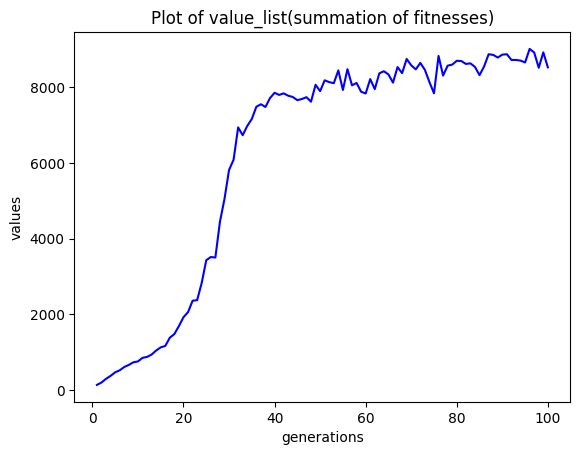

In [87]:
# plot the value_list which is the summation of fitnesses in each generation
plt.plot(GENERATION_LIST, value_list, color="blue")
plt.xlabel('generations')
plt.ylabel('values')
plt.title("Plot of value_list(summation of fitnesses)")
plt.show()

In [88]:
# function to find the the best chromosome of all generations and it's index
def find_max(vals):
    mx = 0
    found = 0
    for i in range(len(vals)):
        if vals[i] > mx:
            mx = vals[i]
            found = i
    return mx, found

max_fitness, ind = find_max(temps)
ans = sols[ind]
print(ans)
for i in range(len(ans)):
    if ans[i] != 0:
        print(Snacks[i].name, ": ", ans[i], sep="")
print("Total Weight:",calculate_weight(Snacks, sols[ind]))
print("Total Value:", calculate_value(Snacks, sols[ind]))

[5.9, 2.7, 3.3, 6.5, 6.0, 0.3, 0.1, 6.0, 7.4, 9.1, 0.5, 2.6, 2.5, 2.8, 5.9, 3.0, 6.3, 7.6, 1.2]
MazMaz: 5.9
Doogh-e-Abali: 2.7
Nani: 3.3
Jooj: 6.5
Hot-Dog: 6.0
Chips: 0.3
Nooshaba: 0.1
Shokolat: 6.0
Chocoroll: 7.4
Cookies: 9.1
Abnabat: 0.5
Adams-Khersi: 2.6
Popcorn: 2.5
Pastil: 2.8
Tordilla: 5.9
Masghati: 3.0
Ghottab: 6.3
Saghe-Talaei: 7.6
Choob-Shoor: 1.2
Total Weight: 79.7
Total Value: 94.729


## Questions

### 1. What problems do a very small or very large initial population cause?
- Very large population sizes: Large populations can lead to increased computational complexity and slower convergence due to the need to evaluate a larger number of chromosomes in each generation. However, they may provide better exploration of the search space, potentially leading to finding better solutions.

- Very small population sizes: Small populations may lead to faster convergence but may suffer from premature convergence to suboptimal solutions. They might also limit diversity within the population, reducing the chance of finding the global optimum.

## 2. If the number of population increases in each period, what effect does it have on the accuracy and speed of the algorithm?
Increasing population size in each generation may lead to faster exploration of the search space, potentially improving the diversity of solutions and enhancing the algorithm's ability to find better solutions. However, it also increases computational complexity and memory usage.
- Acuuracy would increse due to increased diversity.
- Speed would decrese due to computation increase.

## 3. What is the effect of crossover and mutation? Is it possible to use only one of them?
Crossover: Crossover combines genetic information from two parent chromosomes to produce offspring with characteristics inherited from both parents. It promotes exploration of the search space by creating new solutions.

Mutation: Mutation introduces random changes in individual chromosomes, allowing for the introduction of new genetic material and maintaining diversity within the population. It helps in escaping local optima and exploring new regions of the search space.

If we use only one of them, the algorithm will not be able to find the optimal solution. \
Crossover hopes to reach better chromosomes by combining two good chromosomes while mutation is used to escape getting stuck in a local extremum.

## 4. In your opinion, what solutions are there to get a solution to this particular problem faster?
Fine-tune parameters such as mutation rate, crossover rate, population size and ... to balance exploration and exploitation efficiently.
Implement efficient data structures and algorithms to reduce computation time, such as using binary encoding for chromosomes.
Also the fitness function and crossover and mutation functions can be optimized to make the algorithm better.

### 5. Despite the use of these methods, it is still possible that the chromosomes will not change after several steps. Explain the reason for this and the problems it causes. What do you suggest to solve it?
A common problem in genetic algorithms is that we may not find the solution and stuck in a local maixmum instead of global maximum. Via mutation, we can solve this problem. Also, if we see that the algorithm is not converging, we can stop the iterations(limit the number of generations). We may also use multi-start to increase the probabilty of finding the optimal solution.
We can monitor the fitness improvement over successive generations. If the improvement falls below a certain threshold or stagnates, consider terminating the algorithm.

### 6. How to stop the algorithm if there exists no solution?
Set a maximum number of generations or iterations and terminate the algorithm if no feasible solution is found within this limit.
Implement termination criteria based on the fitness values of the best solutions. If the best fitness remains below a certain threshold or fails to improve over several generations, terminate the algorithm.